In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

import matplotlib.pyplot as plt
import numpy as np

In [2]:
N_train = 10
np.random.seed(2020)

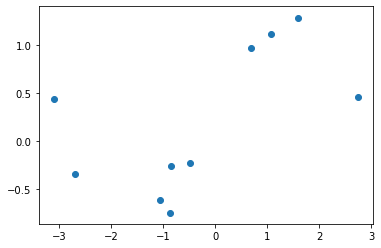

In [3]:
x = np.random.random((N_train,1))*np.pi * np.where(np.random.random((N_train,1))>0.5,1,-1)
y = np.sin(x)  + np.random.random((N_train,1))*0.5
plt.scatter(x,y)

x_test = np.linspace(-np.pi,np.pi,50).reshape((-1,1))


In [4]:
#kernel + GPR
lambda_range = (N_train*1e-9 , N_train*1e-3)
alpha_range = (8.3*1e-5, 0.83)
length_scale = np.sort(1/np.sqrt((2*alpha_range[0], 2*alpha_range[1])))
#kernel
kernel = RBF(length_scale= (length_scale[0] + length_scale[1])/2, length_scale_bounds=length_scale) \
        + WhiteKernel(noise_level= (lambda_range[0] + lambda_range[1])/2 , noise_level_bounds=lambda_range)
gpr1 = GaussianProcessRegressor(kernel)
gpr2 = GaussianProcessRegressor(kernel)

In [5]:
gpr1.fit(x,y)
mu,sigma = gpr1.predict(x_test,return_std=True)


In [6]:
indices = np.random.choice(x.shape[0],int(N_train),replace=True)
gpr2.fit(x[indices],y[indices])
mu2,sigma2 = gpr2.predict(x_test,return_std = True)

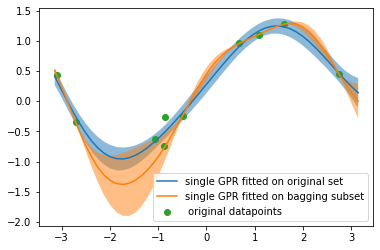

In [8]:
plt.plot(x_test,mu, label="single GPR fitted on original set")
plt.fill_between(x_test.flatten(),mu.flatten()-sigma.flatten(),mu.flatten()+sigma.flatten(),alpha=0.5)
plt.plot(x_test,mu2,label="single GPR fitted on bagging subset")
plt.fill_between(x_test.flatten(),mu2.flatten()-sigma2.flatten(),mu2.flatten()+sigma2.flatten(),alpha=0.5)
plt.scatter(x,y, label=" original datapoints")
plt.legend(loc="lower right")
plt.savefig("GPR_stability.png")

conclusion:
GPR is unstable, (small perturbations can cause large changes);
(soft) baggging seems like a good idea, the uncertainty on certain regions is drastically improved and the predictions go throught it. On the other hand, having to much replacement can lead to a decrease in the 